<a href="https://colab.research.google.com/github/ManuelBagasina/DATCapstone/blob/Jhee/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install asyncpraw

In [13]:
#Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Yahoo Finance
import yfinance as yf

# Firm Selection

In [14]:
#Select the frim for the prediction
firm = "AAPL"

# Apple -> AAPL
# Microsoft -> MSFT
# Nvidia -> NVDA
# Adobe -> ADVE
# Tesla -> TSLA
# Amazon -> AMZN
# Netflix -> NFLX
# Meta -> META
# Alphabet -> GOOGL

In [15]:
!pip install yfinance==0.2.54
!pip install requests-cache

import requests_cache
session = requests_cache.CachedSession(cache_name='yfinance_cache', backend='sqlite', expire_after=3600)

In [16]:
print(firm)

AAPL


In [17]:
# Get the firm's full name
def get_firm_name(ticker):
    stock = yf.Ticker(ticker)
    return stock.info["longName"]  # return Full name

firm_name = get_firm_name(firm)
print(firm_name)  # Full name

Apple Inc.


# Data Collection

### Stock Price

In [18]:
# Fetch data for a single stock
ticker = firm
stock = yf.Ticker(ticker)

# Get historical data
data = stock.history(period="5y") #I just set the period 5 years since yahoo finance api offers free microeconomic data about past 5 years

# Convert to Dataframe
df_stock = pd.DataFrame(data)

# Display
df_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-02-20 00:00:00-05:00,78.295518,78.785727,77.222874,77.730072,100566000,0.0,0.0
2020-02-21 00:00:00-05:00,77.322389,77.766496,75.351836,75.970665,129554000,0.0,0.0
2020-02-24 00:00:00-05:00,72.138754,73.818089,70.190042,72.362015,222195200,0.0,0.0
2020-02-25 00:00:00-05:00,73.034266,73.417696,69.437761,69.910980,230673600,0.0,0.0
2020-02-26 00:00:00-05:00,69.534832,72.289241,69.527552,71.020027,198054800,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-13 00:00:00-05:00,236.910004,242.339996,235.570007,241.529999,53614100,0.0,0.0
2025-02-14 00:00:00-05:00,241.250000,245.550003,240.990005,244.600006,40896200,0.0,0.0
2025-02-18 00:00:00-05:00,244.149994,245.179993,241.839996,244.470001,48822500,0.0,0.0


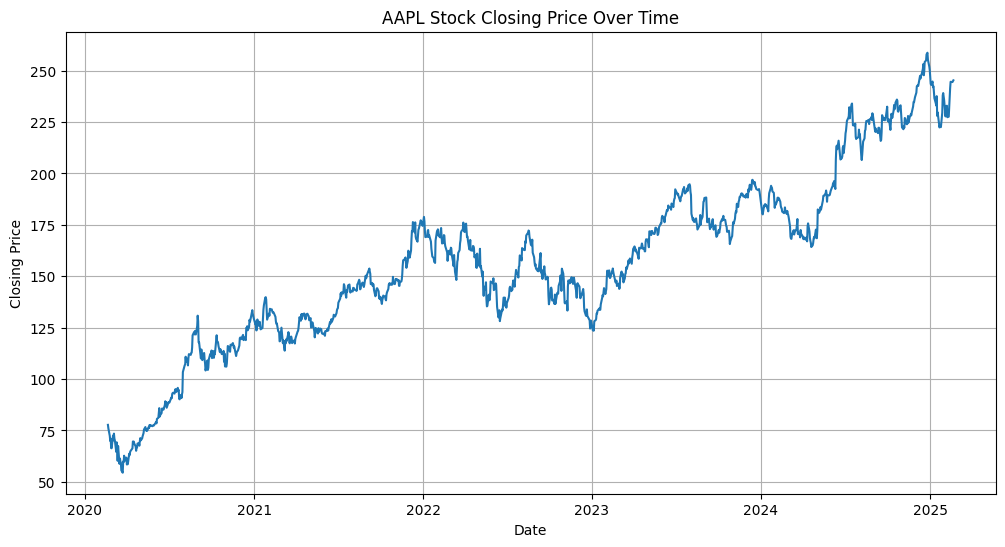

In [19]:
# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(df_stock['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'{firm} Stock Closing Price Over Time')
plt.grid(True)
plt.show()


### Macroeconomic Indicators

In [20]:
!pip install fredapi

In [21]:
from fredapi import Fred

# API key is from https://fred.stlouisfed.org
api_key = "d6ed01a1d424d730c0a92819f41f4c79"
fred = Fred(api_key=api_key)

# Macroeconomic Indicators and Their FRED Codes
# Indicators can be added or revised
indicators = {
    "GDP (Billions USD)": "GDP",
    "Unemployment Rate (%)": "UNRATE",
    "Producer Price Index (PPI)": "PPIACO",
    "Retail Sales (Millions USD)": "RSAFS",
    "Industrial Production Index": "INDPRO",
    "Housing Starts (Thousands)": "HOUST",
    "Personal Consumption Expenditures (PCE)": "PCE",
    "Trade Balance (Billions USD)": "BOPGSTB",
    "M2 Money Supply (Billions USD)": "M2",
    "Consumer Confidence Index": "UMCSENT",
}

# Fetch Data for Each Indicator
data = {}
for name, code in indicators.items():
    data[name] = fred.get_series(code)

# Convert to DataFrame
df_macro = pd.DataFrame(data)

# Display the data
df_macro


,GDP (Billions USD),Unemployment Rate (%),Producer Price Index (PPI),Retail Sales (Millions USD),Industrial Production Index,Housing Starts (Thousands),Personal Consumption Expenditures (PCE),Trade Balance (Billions USD),M2 Money Supply (Billions USD),Consumer Confidence Index
1913-01-01,NaN,NaN,12.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-02-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-03-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-04-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-05-01,NaN,NaN,11.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-09-01,NaN,4.1,252.682,716388.0,102.5873,1355.0,20044.1,-84333.0,NaN,70.1
2024-10-01,29700.58,4.1,253.081,720393.0,102.1219,1344.0,20134.5,-74153.0,NaN,70.5
2024-11-01,NaN,4.2,253.229,725079.0,101.9736,1305.0,20253.6,-78940.0,NaN,71.8
2024-12-01,NaN,4.1,253.590,730300.0,102.9833,1515.0,20387.2,-98431.0,NaN,74.0


### Microeconomic Indicators

In [22]:
# Fetch company data
stock = yf.Ticker(firm)

# Fetch Financial Statements
financials = stock.financials.T  # Income Statement (Revenue, Profit, Margins)
balance_sheet = stock.balance_sheet.T  # Assets, Liabilities, Equity
cash_flow = stock.cashflow.T  # Cash from Operations, Investments, Financing

# Convert to DataFrame
df_financials = pd.DataFrame(financials)
df_balance_sheet = pd.DataFrame(balance_sheet)
df_cash_flow = pd.DataFrame(cash_flow)

df_micro = pd.concat([df_financials, df_balance_sheet, df_cash_flow], axis=1)
df_micro

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,Interest Expense,...,Change In Inventory,Change In Receivables,Changes In Account Receivables,Other Non Cash Items,Stock Based Compensation,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Net Income From Continuing Operations
2024-09-30,0.0,0.241,134661000000.0,93736000000.0,11445000000.0,210352000000.0,134661000000.0,123216000000.0,NaN,NaN,...,-1046000000.0,-5144000000.0,-3788000000.0,-2266000000.0,11688000000.0,NaN,NaN,11445000000.0,11445000000.0,93736000000.0
2023-09-30,0.0,0.147,125820000000.0,96995000000.0,11519000000.0,214137000000.0,125820000000.0,114301000000.0,-183000000.0,3933000000.0,...,-1618000000.0,-417000000.0,-1688000000.0,-2227000000.0,10833000000.0,NaN,NaN,11519000000.0,11519000000.0,96995000000.0
2022-09-30,0.0,0.162,130541000000.0,99803000000.0,11104000000.0,223546000000.0,130541000000.0,119437000000.0,-106000000.0,2931000000.0,...,1484000000.0,-9343000000.0,-1823000000.0,1006000000.0,9038000000.0,895000000.0,895000000.0,11104000000.0,11104000000.0,99803000000.0
2021-09-30,0.0,0.133,123136000000.0,94680000000.0,11284000000.0,212981000000.0,123136000000.0,111852000000.0,198000000.0,2645000000.0,...,-2642000000.0,-14028000000.0,-10125000000.0,-4921000000.0,7906000000.0,-4774000000.0,-4774000000.0,11284000000.0,11284000000.0,94680000000.0
2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,890000000.0,2873000000.0,...,NaN,NaN,NaN,NaN,NaN,-215000000.0,-215000000.0,NaN,NaN,NaN


In [23]:
df_micro.columns.tolist() #We can choose the moste relevent indicators

['Tax Effect Of Unusual Items',
 'Tax Rate For Calcs',
 'Normalized EBITDA',
 'Net Income From Continuing Operation Net Minority Interest',
 'Reconciled Depreciation',
 'Reconciled Cost Of Revenue',
 'EBITDA',
 'EBIT',
 'Net Interest Income',
 'Interest Expense',
 'Interest Income',
 'Normalized Income',
 'Net Income From Continuing And Discontinued Operation',
 'Total Expenses',
 'Total Operating Income As Reported',
 'Diluted Average Shares',
 'Basic Average Shares',
 'Diluted EPS',
 'Basic EPS',
 'Diluted NI Availto Com Stockholders',
 'Net Income Common Stockholders',
 'Net Income',
 'Net Income Including Noncontrolling Interests',
 'Net Income Continuous Operations',
 'Tax Provision',
 'Pretax Income',
 'Other Income Expense',
 'Other Non Operating Income Expenses',
 'Net Non Operating Interest Income Expense',
 'Interest Expense Non Operating',
 'Interest Income Non Operating',
 'Operating Income',
 'Operating Expense',
 'Research And Development',
 'Selling General And Administr

### Sentiment Analysis

##### yhfinance web scrapping

In [24]:
#Yahoo Finance web scrapping initialization
import requests
from bs4 import BeautifulSoup

url = f"https://finance.yahoo.com/quote/{firm}/news"

headers = {
    "User-Agent": "Mozilla/5.0"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# print(soup.prettify())

In [25]:
# Find Articles Title
articles_title = soup.find_all("h3", class_="clamp")

# Find Posted times
articles_time = soup.find_all(class_="publishing yf-1weyqlp")

# Find Articles Summaries
articles_summary = soup.find_all("p", class_="yf-82qtw3")

# Make list for titles
article_title_list = []
for article_title in articles_title:
    article_title_list.append(article_title.text)

# Make list for times
article_time_list = []
for article_time in articles_time:
    article_time_list.append(article_time.text.split("•")[1].strip())

# Make list for summaries
article_summary_list = []
for article_summary in articles_summary:
    article_summary_list.append(article_summary.text)

#Dataframe
yh_article_titles_df = pd.DataFrame({"Time": article_time_list, "Title": article_title_list, "Summary": article_summary_list})

yh_article_titles_df

,Time,Title,Summary
0,21 minutes ago,"In India, Apple's iPhone 16e faces stiff compe...","On Wednesday, Apple unveiled the iPhone 16e. T..."
1,2 hours ago,Is the stock rally showing signs of stalling? ...,"US stocks (^DJI, ^IXIC, ^GSPC) are falling Thu..."
2,33 minutes ago,Apple Inc. (AAPL): Among the Best Long-Term St...,We recently compiled a list of the 12 Best Lon...
3,44 minutes ago,American Airlines Joins Rivals in Integrating ...,American Airlines has introduced a feature tha...
4,59 minutes ago,"Apple Speeds Up Hardware Shift, Phases Out Bro...",Apple moves faster on in-house chip developmen...
5,1 hour ago,What Wall Street experts are saying about Alib...,Alibaba Group (BABA) is scheduled to report re...
6,1 hour ago,"Apple unveils iPhone 16e, Arista reports Q4 be...",Get caught up quickly on the top news and call...
7,2 hours ago,Can the Latest iPhone 16e Push the Apple Stock...,Although AAPL's AI push and growing Services b...
8,2 hours ago,Apple Inc. (AAPL) Unveils iPhone 16e: Affordab...,We recently compiled a list of the 10 Trending...
9,2 hours ago,"Magnificent Seven Stocks: Nvidia, Tesla Slide;...","Dubbed the Magnificent Seven stocks, Apple, Mi..."


In [27]:
import asyncpraw
import asyncio
import nest_asyncio
import datetime
import random
import time

nest_asyncio.apply()  # Prevent async loop errors

# Stock-related keywords
# Relevant stock market subreddits
stock_subreddits = ["stocks", "StockMarket"]

# Reddit API Function to Get 5 Random Posts Per Day for the Past 14 Days
async def fetch_stock_news_past_7_days():
    reddit = asyncpraw.Reddit(
        client_id="ardOQiL60Y2K7KF0V_WMGA",
        client_secret="oyNdfuaDlVeSwV7qmgSRP5bFcYru-Q",
        user_agent="my_reddit_scraper"
    )

    today = datetime.datetime.utcnow()
    start_date = today - datetime.timedelta(days=7)  # Start 13 days ago, includes today

    data = []

    print(f" Fetching data from {start_date.strftime('%Y-%m-%d')} to {today.strftime('%Y-%m-%d')}...")

    for firm_name in firm:  # Iterate over each company
        total_found = 0

        for day_offset in range(7):  # Loop through the past 14 days
            search_date = start_date + datetime.timedelta(days=day_offset)
            next_day = search_date + datetime.timedelta(days=1)

            for subreddit_name in stock_subreddits:
                print(f" Fetching {firm_name} posts from r/{subreddit_name} on {search_date.strftime('%Y-%m-%d')}...")

                try:
                    subreddit_obj = await reddit.subreddit(subreddit_name)
                except Exception as e:
                    print(f" Error accessing subreddit {subreddit_name}: {e}")
                    continue  # Skip to the next subreddit if an error occurs

                found_posts = []

                async for post in subreddit_obj.search(
                    query=firm_name,
                    sort="relevance",
                    time_filter="year",  # Searching across a year but filtering manually
                    limit=100
                ):
                    if not post or not post.title:  # Handle cases where API returns None
                        continue

                    post_date = datetime.datetime.utcfromtimestamp(post.created_utc)

                    # Ensure the post belongs to the correct day
                    if search_date.date() <= post_date.date() < next_day.date():
                        found_posts.append({
                            "Company": firm_name,
                            "Subreddit": subreddit_name,
                            "Title": post.title,
                            "Score": post.score,
                            "URL": post.url.strip(),
                            "Date": post_date.strftime('%Y-%m-%d'),
                            "Content": post.selftext[:300]  # Limit content to 300 characters
                        })

                await asyncio.sleep(1.0)  # Prevent rate-limiting

                # Ensure we don't sample more than the available number of posts
                if len(found_posts) > 5:
                    found_posts = random.sample(found_posts, 5)  # Select 5 at random
                elif len(found_posts) > 0:
                    found_posts = found_posts  # Take all available posts
                else:
                    continue  # Skip if no posts were found

                data.extend(found_posts)
                total_found += len(found_posts)

        print(f" {firm_name}: Total collected over 7 days = {total_found} posts\n")

    await reddit.close()
    df = pd.DataFrame(data)

    if df.empty:
        print(" No data was collected for the past 7 days. Check API request & filters.")
    else:
        print("\n Data Summary:")
        print(df["Company"].value_counts())
        print(df["Date"].value_counts())
        print(df.sample(min(10, len(df))))  # Show up to 10 random samples

    return df

# Execution
if __name__ == "__main__":
    asyncio.run(fetch_stock_news_past_7_days())


 Fetching data from 2025-02-13 to 2025-02-20...
 Fetching A posts from r/stocks on 2025-02-13...
 Fetching A posts from r/StockMarket on 2025-02-13...
 Fetching A posts from r/stocks on 2025-02-14...
 Fetching A posts from r/StockMarket on 2025-02-14...
 Fetching A posts from r/stocks on 2025-02-15...
 Fetching A posts from r/StockMarket on 2025-02-15...
 Fetching A posts from r/stocks on 2025-02-16...
 Fetching A posts from r/StockMarket on 2025-02-16...
 Fetching A posts from r/stocks on 2025-02-17...
 Fetching A posts from r/StockMarket on 2025-02-17...
 Fetching A posts from r/stocks on 2025-02-18...
 Fetching A posts from r/StockMarket on 2025-02-18...
 Fetching A posts from r/stocks on 2025-02-19...
 Fetching A posts from r/StockMarket on 2025-02-19...
 A: Total collected over 180 days = 10 posts

 Fetching A posts from r/stocks on 2025-02-13...
 Fetching A posts from r/StockMarket on 2025-02-13...
 Fetching A posts from r/stocks on 2025-02-14...
 Fetching A posts from r/StockMar

KeyboardInterrupt: 

02.10 Ri-on: I successfully set up a system to search for articles related to a specified company and extract the title, posting time, and summary in the yahoo finance website. However, the scraping currently only captures the articles displayed at the top of the webpage. To retrieve older data, further improvements are needed.

##### Reddit seb scrapping

In [ ]:
import asyncpraw  # Reddit API Library
import asyncio  # Asynchronous execution
import nest_asyncio  # Prevent async loop errors
import datetime  # For date filtering
import random  # For random sampling
import time  # Prevent Reddit rate-limiting

nest_asyncio.apply()  # Preventing async loop errors

# Use only the most relevant stock market subreddits
stock_subreddits = ["stocks", "StockMarket"]

# Keywords for refining searches
firm_keywords = {
    "Apple": ["Apple Inc", "AAPL", "iPhone", "Macbook", "Tim Cook"],
    "Google": ["Google LLC", "GOOGL", "Alphabet", "Google AI", "Sundar Pichai"],
    "Tesla": ["Tesla Inc", "TSLA", "Elon Musk", "Tesla stock"],
    "Microsoft": ["Microsoft Corp", "MSFT", "Azure", "Satya Nadella"],
    "Amazon": ["Amazon.com", "AMZN", "AWS", "Jeff Bezos"],
    "Nvidia": ["Nvidia Corp", "NVDA", "GPU", "RTX 4090"],
    "Meta": ["Meta Platforms", "META", "Facebook stock", "Mark Zuckerberg"],
}

# Reddit API Function to Get a Year's Worth of News (500 Random Posts Per Day)
async def fetch_stock_news_randomized():
    reddit = asyncpraw.Reddit(
        client_id="ardOQiL60Y2K7KF0V_WMGA",
        client_secret="oyNdfuaDlVeSwV7qmgSRP5bFcYru-Q",
        user_agent="my_reddit_scraper"
    )

    # Start collecting posts from 1 year ago up to today
    today = datetime.datetime.utcnow()
    start_date = today - datetime.timedelta(days=365)

    # Store data
    data = []

    for single_date in (start_date + datetime.timedelta(n) for n in range(365)):  # Loop through each day in the past year
        print(f"Fetching data for {single_date.strftime('%Y-%m-%d')}...")

        daily_posts = []  # Temporary storage for that day's posts

        for firm_name, keywords in firm_keywords.items():  # Loop through all companies
            for subreddit_name in stock_subreddits:  # Loop through selected subreddits
                try:
                    subreddit = await reddit.subreddit(subreddit_name)
                except Exception as e:
                    print(f"Error accessing subreddit {subreddit_name}: {e}")
                    continue  # Skip to the next subreddit if an error occurs

                async for post in subreddit.search(
                    query=f"{firm_name} OR {' OR '.join(keywords)}",
                    sort="new",
                    time_filter="day",  # Fetches posts from this single day
                    limit=1000  # Get as many as possible, then we randomly select 500
                ):
                    post_date = datetime.datetime.utcfromtimestamp(post.created_utc)
                    if post_date.date() != single_date.date():
                        continue  # Ignore posts outside the target date

                    full_url = post.url.strip()
                    if full_url.startswith("https://www.reddit.com/"):  # Ensure only valid Reddit posts
                        daily_posts.append({
                            "Company": firm_name,
                            "Subreddit": subreddit_name,
                            "Title": post.title,
                            "Score": post.score,
                            "URL": full_url, # optional
                            "Date": post_date.strftime('%Y-%m-%d'),
                            "Content": post.selftext[:250]  # Limit content to 250 words
                        })

                time.sleep(0.5)  # Prevents Reddit from slowing us down

        # Randomly sample 50 posts from that day (or take all if less than 50 exist)
        if len(daily_posts) > 50:
            daily_posts = random.sample(daily_posts, 50)

        # Store the sampled posts
        data.extend(daily_posts)

    await reddit.close()
    df = pd.DataFrame(data)
    return df

# Execution
if __name__ == "__main__":
    df = asyncio.run(fetch_stock_news_randomized())  # Fetch all stock discussions for the year
    print(df)


In [ ]:
# Test code

import asyncpraw  # Reddit API Library
import asyncio  # Asynchronous execution
import nest_asyncio  # Prevent async loop errors
import pandas as pd  # Handling structured data
import datetime  # For date filtering
import random  # For random sampling
import time  # Prevent Reddit rate-limiting

nest_asyncio.apply()  # Preventing async loop errors

# ✅ Stock-related keywords
firm_keywords = {
    "Apple": ["Apple", "AAPL", "iPhone", "Macbook", "Tim Cook"]
}

# ✅ Relevant stock market subreddits
stock_subreddits = ["stocks", "StockMarket", "investing", "finance"]

# ✅ Reddit API Function to Get a Full Year of News (500 Random Posts Per Day)
async def fetch_stock_news_randomized():
    reddit = asyncpraw.Reddit(
        client_id="ardOQiL60Y2K7KF0V_WMGA",
        client_secret="oyNdfuaDlVeSwV7qmgSRP5bFcYru-Q",
        user_agent="my_reddit_scraper"
    )

    today = datetime.datetime.utcnow()
    start_date = today - datetime.timedelta(days=365)

    data = []

    print(f"🔍 Fetching data from {start_date.strftime('%Y-%m-%d')} to {today.strftime('%Y-%m-%d')}...")

    for firm_name, keywords in firm_keywords.items():
        total_found = 0

        for subreddit_name in stock_subreddits:
            print(f"🔄 Fetching Reddit API for {firm_name} in r/{subreddit_name}...")

            try:
                subreddit_obj = await reddit.subreddit(subreddit_name)
            except Exception as e:
                print(f"⚠️ Error accessing subreddit {subreddit_name}: {e}")
                continue  # ✅ Skip to the next subreddit if an error occurs

            after = None  # ✅ Pagination key
            found_posts = []

            while len(found_posts) < 5000:  # ✅ Collect up to 5000 posts total
                params = {"after": after} if after else {}  # ✅ Only add `after` if valid

                async for post in subreddit_obj.search(
                    query=f'"{firm_name}" OR {" OR ".join(keywords)}',
                    sort="new",
                    time_filter="year",  # ✅ Get posts from the past year
                    limit=100
                ):
                    if not post or not post.title:  # ✅ Handle cases where API returns None
                        continue

                    post_date = datetime.datetime.utcfromtimestamp(post.created_utc).strftime('%Y-%m-%d')
                    found_posts.append({
                        "Company": firm_name,
                        "Subreddit": subreddit_name,
                        "Title": post.title,
                        "Score": post.score,
                        "URL": post.url.strip(),
                        "Date": post_date,
                        "Content": post.selftext[:500]  # ✅ Limit content to 500 words
                    })

                    after = post.id  # ✅ Get next batch

                await asyncio.sleep(1.0)  # ✅ Prevent rate-limiting

                if not after or len(found_posts) >= 5000:  # ✅ Stop after 5000 posts
                    break

            print(f"🔹 {firm_name}: Found {len(found_posts)} posts in r/{subreddit_name}.")

            total_found += len(found_posts)

            # ✅ Ensure we have 500 posts per day
            if len(found_posts) > 500:
                found_posts = random.sample(found_posts, 500)

            data.extend(found_posts)

        print(f" {firm_name}: Total collected = {total_found} posts\n")

    await reddit.close()
    df = pd.DataFrame(data)

    if df.empty:
        print("❌ No data was collected. Check API request & filters.")
    else:
        print("\n📌 Data Summary:")
        print(df["Company"].value_counts())
        print(df["Date"].value_counts())
        print(df.sample(10))

    return df

# ✅ Execution
if __name__ == "__main__":
    df = asyncio.run(fetch_stock_news_randomized())

02.10 Ri-on: Added draft for web scrapping reddit posts

##### Data Merging (Sentiment Analysis)

##### Text Quantification

### Data Merging

# EDA

# Feature Engineering

# Modeling

# Evaluation